In [1]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('슝=3')

슝=3


(385, 578, 3)
(3072, 4621, 3)
(1440, 1080, 3)


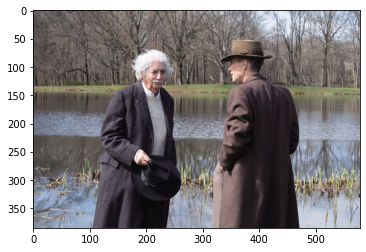

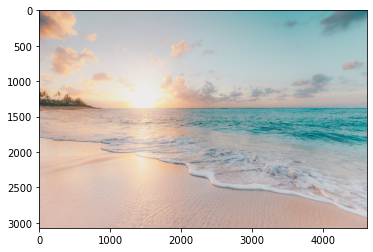

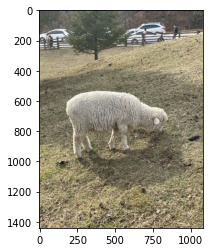

In [2]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/movie.jpg'  
img_orig = cv2.imread(img_path)

img_sheep_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/sheep.jpg'
img_sheep = cv2.imread(img_sheep_path)

img_back_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/바다사진.jpg' 
img_back = cv2.imread(img_back_path) 

print(img_orig.shape)
print(img_back.shape)
print(img_sheep.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_back, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_sheep, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f36ec1482b0>)

In [4]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

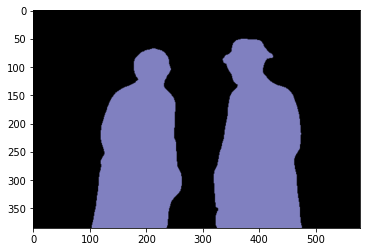

In [7]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [8]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [9]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [10]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [11]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(385, 578)


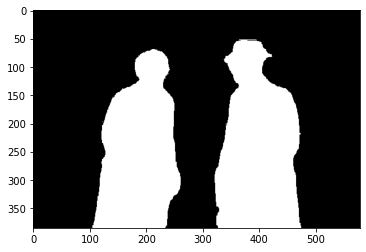

In [12]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

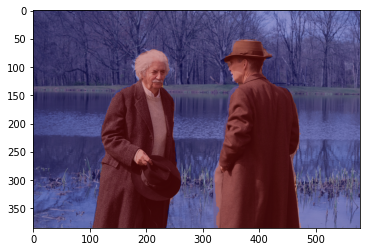

In [13]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

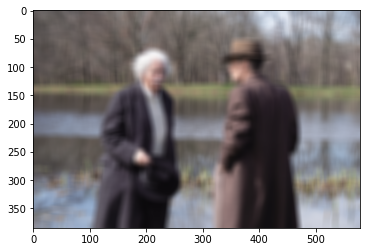

In [14]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

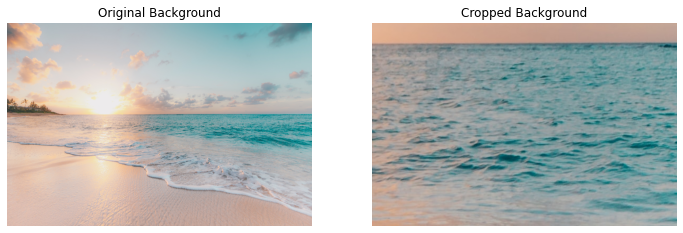

In [15]:
# 배경 이미지의 크기를 가져옵니다.
height_bg, width_bg = img_back.shape[:2]

# 타겟 이미지의 크기를 가져옵니다. (이전에 이미 불러왔던 img_orig에서)
height, width = img_orig.shape[:2]

# 배경 이미지를 타겟 이미지의 크기에 맞게 크롭합니다.
# 중앙에서부터 크롭을 시작합니다.
start_x = (width_bg - width) // 2
start_y = (height_bg - height) // 2
end_x = start_x + width
end_y = start_y + height

# 실제로 크롭을 수행합니다.
cropped_background = img_back[start_y:end_y, start_x:end_x]

# 결과를 확인합니다.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Background")
plt.imshow(cv2.cvtColor(img_back, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Cropped Background")
plt.imshow(cv2.cvtColor(cropped_background, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


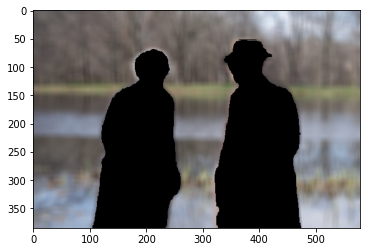

In [16]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

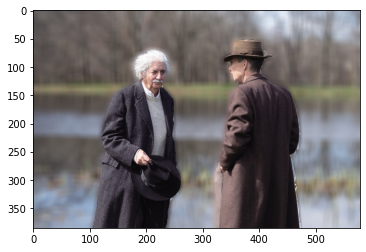

In [17]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat1 = np.where(img_mask_color==255, img_orig, img_orig_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat1, cv2.COLOR_BGR2RGB))
plt.show()

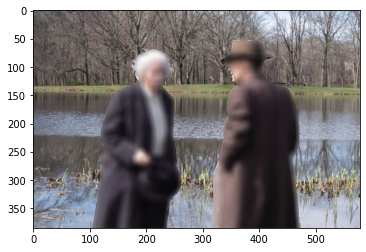

In [18]:
# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_concat2 = np.where(img_mask_color == 255, img_orig_blur, img_orig)
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.show()

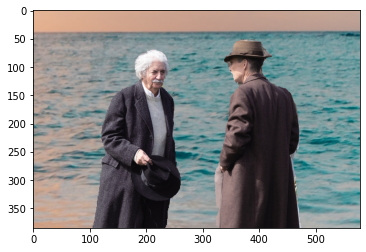

In [19]:
#배경을 변경
img_concat3 = np.where(img_mask_color == 255, img_orig, cropped_background)
plt.imshow(cv2.cvtColor(img_concat3, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
segvalues2, output2 = model.segmentAsPascalvoc(img_sheep_path)

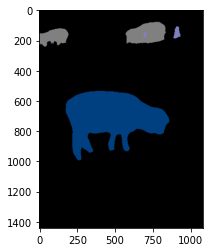

In [21]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output2)
plt.show()

In [22]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues2['class_ids']:
    print(LABEL_NAMES[class_id])

background
car
person
sheep


In [23]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [24]:
colormap[17] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 17번째인 양)

array([128,  64,   0])

In [25]:
seg_color2 = (0,64,128) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(1440, 1080)


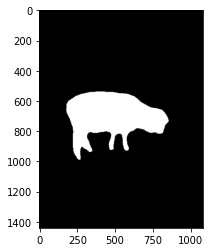

In [26]:
seg_map2 = np.all(output2==seg_color2, axis=-1) 
print(seg_map2.shape) 
plt.imshow(seg_map2, cmap='gray')
plt.show()

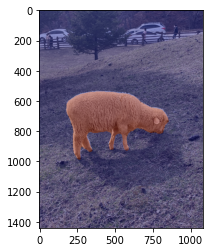

In [27]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show2 = img_sheep.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask2 = seg_map2.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show2 = cv2.addWeighted(img_show2, 0.6, color_mask2, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))
plt.show()

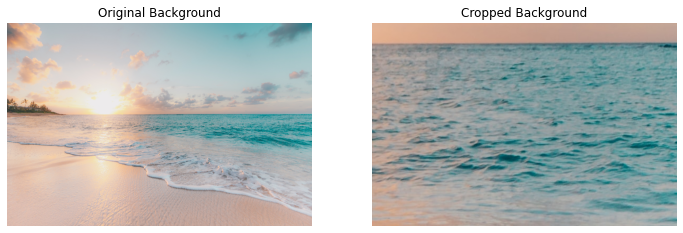

In [28]:
# 배경 이미지의 크기를 가져옵니다.
height_bg, width_bg = img_back.shape[:2]

# 타겟 이미지의 크기를 가져옵니다. (이전에 이미 불러왔던 img_sheep에서)
height, width = img_sheep.shape[:2]

# 배경 이미지를 타겟 이미지의 크기에 맞게 크롭합니다.
# 중앙에서부터 크롭을 시작합니다.
start_x = (width_bg - width) // 2
start_y = (height_bg - height) // 2
end_x = start_x + width
end_y = start_y + height

# 실제로 크롭을 수행합니다.
cropped_background2 = img_back[start_y:end_y, start_x:end_x]

# 결과를 확인합니다.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Background")
plt.imshow(cv2.cvtColor(img_back, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Cropped Background")
plt.imshow(cv2.cvtColor(cropped_background, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

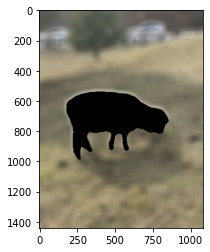

In [29]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_sheep_blur = cv2.blur(img_sheep, (50,50))

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask2 = cv2.bitwise_not(img_mask_color2)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur2 = cv2.bitwise_and(img_sheep_blur, img_bg_mask2)
plt.imshow(cv2.cvtColor(img_bg_blur2, cv2.COLOR_BGR2RGB))
plt.show()

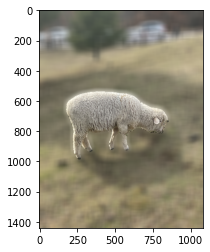

In [30]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat4 = np.where(img_mask_color2==255, img_sheep, img_sheep_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat4, cv2.COLOR_BGR2RGB))
plt.show()

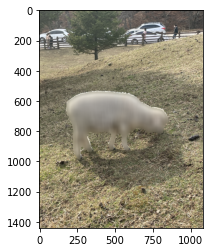

In [38]:
#양 블러
img_concat5 = np.where(img_mask_color2 == 255, img_sheep_blur, img_sheep)
plt.imshow(cv2.cvtColor(img_concat5, cv2.COLOR_BGR2RGB))
plt.show()

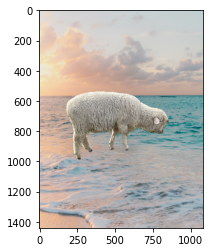

In [39]:
#배경을 변경
img_concat6 = np.where(img_mask_color2 == 255, img_sheep, cropped_background2)
plt.imshow(cv2.cvtColor(img_concat6, cv2.COLOR_BGR2RGB))
plt.show()

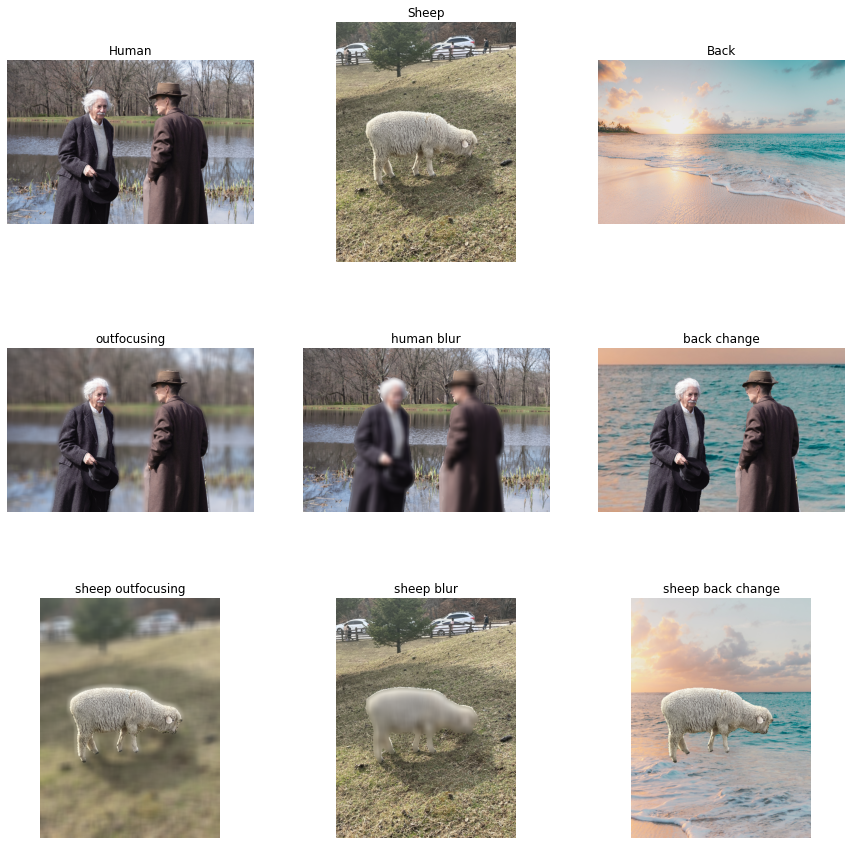

In [40]:
# 모든 이미지를 한 번에 출력하기
plt.figure(figsize=(15, 15))

# 첫 번째 줄
plt.subplot(3, 3, 1)
plt.title("Human")
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title("Sheep")
plt.imshow(cv2.cvtColor(img_sheep, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title("Back")
plt.imshow(cv2.cvtColor(img_back, cv2.COLOR_BGR2RGB))
plt.axis('off')

# 두 번째 줄
plt.subplot(3, 3, 4)
plt.title("outfocusing")
plt.imshow(cv2.cvtColor(img_concat1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title("human blur")
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title("back change")
plt.imshow(cv2.cvtColor(img_concat3, cv2.COLOR_BGR2RGB))
plt.axis('off')

# 세 번째 줄
plt.subplot(3, 3, 7)
plt.title("sheep outfocusing")
plt.imshow(cv2.cvtColor(img_concat4, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 3, 8)
plt.title("sheep blur")
plt.imshow(cv2.cvtColor(img_concat5, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 3, 9)
plt.title("sheep back change")
plt.imshow(cv2.cvtColor(img_concat6, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


In [44]:
# 가상의 img_concat1 이미지를 저장할 경로를 지정합니다.
# 실제 코드에서는 이미 생성된 img_concat1 이미지를 이용하게 됩니다.
img_concat1_save_path = '/aiffel/outfocus.jpg'

# 이미지를 저장합니다.
try:
    cv2.imwrite(img_concat1_save_path, img_concat1)
    print(f"Image saved at {img_concat1_save_path}")
except Exception as e:
    print(f"An error occurred: {e}")


# 저장된 이미지 파일의 경로를 반환합니다.
img_concat1_save_path


Image saved at /aiffel/outfocus.jpg


'/aiffel/outfocus.jpg'

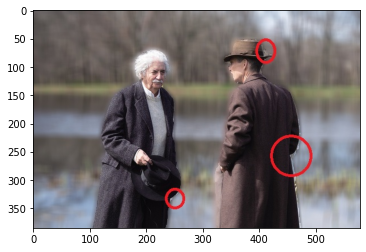

In [45]:
img_fault_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/outfocus.jpg' 
img_fault = cv2.imread(img_fault_path) 
plt.imshow(cv2.cvtColor(img_fault, cv2.COLOR_BGR2RGB))
plt.show()

# 문제점
## 1. 위의 사진과 같이 사람을 segmenting 하는 경우 경계를 말끔하게 잡아내지 못한다.

## 2. blur를 인물을 제외한 곳에 전체적으로 처리하여 DOF(피사계 심도)가 고려되지 않았다.



피사계심도(Depth of Field, 줄여서 DOF)는 사진에서 초점이 맞은 부분을 중심으로 앞뒤로 얼마나 많은 영역이 선명하게 표현되는지를 나타내는 용어입니다. 피사계심도가 좁으면 초점이 맞은 지점만 선명하게 나타나고 그 외의 부분은 흐려지게 됩니다. 반대로 피사계심도가 넓으면 많은 영역이 선명하게 표현됩니다.

피사계심도는 다음과 같은 요소에 의해 결정됩니다:

1. **조리개 크기 (Aperture)**: 조리개의 크기는 \( f \) 번호로 표시되며, 작은 \( f \) 번호는 큰 조리개를 의미합니다. 큰 조리개 (작은 \( f \) 번호)는 피사계심도를 좁게 만들고, 작은 조리개 (큰 \( f \) 번호)는 피사계심도를 넓게 만듭니다.
2. **촬영 대상과의 거리**: 대상과의 거리가 가까울수록 피사계심도는 좁아집니다.
3. **렌즈의 초점 거리 (Focal length)**: 긴 초점 거리의 렌즈 (예: 망원 렌즈)는 피사계심도를 좁게 만들며, 짧은 초점 거리의 렌즈 (예: 광각 렌즈)는 피사계심도를 넓게 만듭니다.

피사계심도를 조절하여 사진의 분위기나 감각을 다르게 표현할 수 있습니다. 예를 들어, 인물 사진에서 배경을 흐리게 하여 인물을 강조하려면 피사계심도를 좁게 조절할 수 있습니다. 반대로 풍경 사진에서 전체를 선명하게 표현하려면 피사계심도를 넓게 조절합니다.


# 라이다 센서를 활용한 카메라

라이다(LiDAR : Light Detection And Ranging) 기술은 '빛' 정확하게 말하면 '레이저 광'이 장애물에 맞고 되돌아오는 시간과 각도를 측정해 해당 장애물 위치와 형상을 정확히 인지하는 기술을 일컫는다. 

https://sites.google.com/view/struct2depth#h.p_BXVg-W9pyn7P

해당 논문을 보면 AI 모델을 통해 사진에서 각 물체들의 깊이 정보를 얻고 있다. 그치만 위에서 테스트한 모델에서와 같이 정확한 경계선 구분은 accuracy가 1.0이 되지 않는 이상 구현하기 힘들다. 

Lidar 센서를 활용하게 되는 경우 semgmenting을 통해 얻어내는 경계선과 더불에 lidar 센서를 통해 얻어내는 피사체의 정보가 들어오게 된다. 이러한 정보에는 경계선과 거리가 포함될 수 있다. 따라서 사진을 촬영할때 라이다 센서를 통해 거리에 대한 정보를 얻어낸다면 이미지의 용량은 증가 할 수 있으나 추후에 보정을 하게 되는경우 렌즈 또는 촬영거리에 따라 달라질 수 있는 이미지 특성들을 정보 입력을 통해 구현 할 수 있을 것으로 보인다. 